# IMPORTATION DES BIBLIOTHEQUES

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering 
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
import warnings
from mpl_toolkits.mplot3d import Axes3D  # Importer la classe Axes3D pour la projection 3D
warnings.filterwarnings("ignore") 

# CHARGEMENT DES DONNEES

In [51]:
df = pd.read_excel("Customer Data.xlsx")
df.head()

,Client_ID,Solde,Fréquence de solde,Achats,Achats ponctuels,Achats en versements,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des achats en versements,Fréquence des avances de trésorerie,Nombre d'achats,Limite de crédit,Paiements
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000,201.802084
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000,4103.032597
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500,622.066742
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200,678.334763


# ANALYSE EXPLORATOIRE DES DONNEES: EDA

In [52]:
df.shape

(351, 14)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Client_ID                            351 non-null    object 
 1   Solde                                351 non-null    float64
 2   Fréquence de solde                   351 non-null    float64
 3   Achats                               351 non-null    float64
 4   Achats ponctuels                     351 non-null    float64
 5   Achats en versements                 351 non-null    float64
 6   Avance de trésorerie                 351 non-null    float64
 7   Fréquence des achats                 351 non-null    float64
 8   Fréquence des achats ponctuels       351 non-null    float64
 9   Fréquence des achats en versements   351 non-null    float64
 10  Fréquence des avances de trésorerie  351 non-null    float64
 11  Nombre d'achats                 

Je remarque que la variable "Client_ID" est de type objet, je peux la suprimer vu qu elle est inutile dans cette analyse.

In [54]:
# Supprimer la colonne 'CUST_ID' car elle n'est pas utilisée
df.drop(columns=["Client_ID"],axis=1,inplace=True)

In [55]:
df.columns

Index(['Solde', 'Fréquence de solde', 'Achats', 'Achats ponctuels',
       'Achats en versements', 'Avance de trésorerie', 'Fréquence des achats',
       'Fréquence des achats ponctuels', 'Fréquence des achats en versements',
       'Fréquence des avances de trésorerie', 'Nombre d'achats',
       'Limite de crédit', 'Paiements'],
      dtype='object')

In [56]:
#Nouvelle dimensions de df
df.shape

(351, 13)

In [57]:
df.describe()

,Solde,Fréquence de solde,Achats,Achats ponctuels,Achats en versements,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des achats en versements,Fréquence des avances de trésorerie,Nombre d'achats,Limite de crédit,Paiements
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,2421.218379,0.894845,1504.726410,905.468006,599.258405,1197.556718,0.526326,0.264772,0.379172,0.132125,19.019943,6321.794872,2461.918636
std,2790.829507,0.222940,2858.548263,2089.145182,1254.393525,2801.675287,0.399999,0.334108,0.404908,0.205175,30.559023,4499.795478,4034.786089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,279.875406,0.909091,101.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,2.000000,2500.000000,481.733982
50%,1562.633343,1.000000,540.000000,190.600000,104.850000,0.000000,0.500000,0.083333,0.166667,0.000000,9.000000,5700.000000,1206.811880
75%,3538.201570,1.000000,1643.615000,974.135000,689.520000,1068.643161,1.000000,0.416667,0.833333,0.166667,21.000000,9000.000000,2558.838161
max,19043.138560,1.000000,32539.780000,26547.430000,12560.850000,27296.485760,1.000000,1.000000,1.000000,0.909091,217.000000,23000.000000,32048.612200


In [58]:
df.isnull().sum()

Solde                                  0
Fréquence de solde                     0
Achats                                 0
Achats ponctuels                       0
Achats en versements                   0
Avance de trésorerie                   0
Fréquence des achats                   0
Fréquence des achats ponctuels         0
Fréquence des achats en versements     0
Fréquence des avances de trésorerie    0
Nombre d'achats                        0
Limite de crédit                       0
Paiements                              0
dtype: int64

In [59]:
# Vérification des lignes en double dans l'ensemble de données
df.duplicated().sum()

0

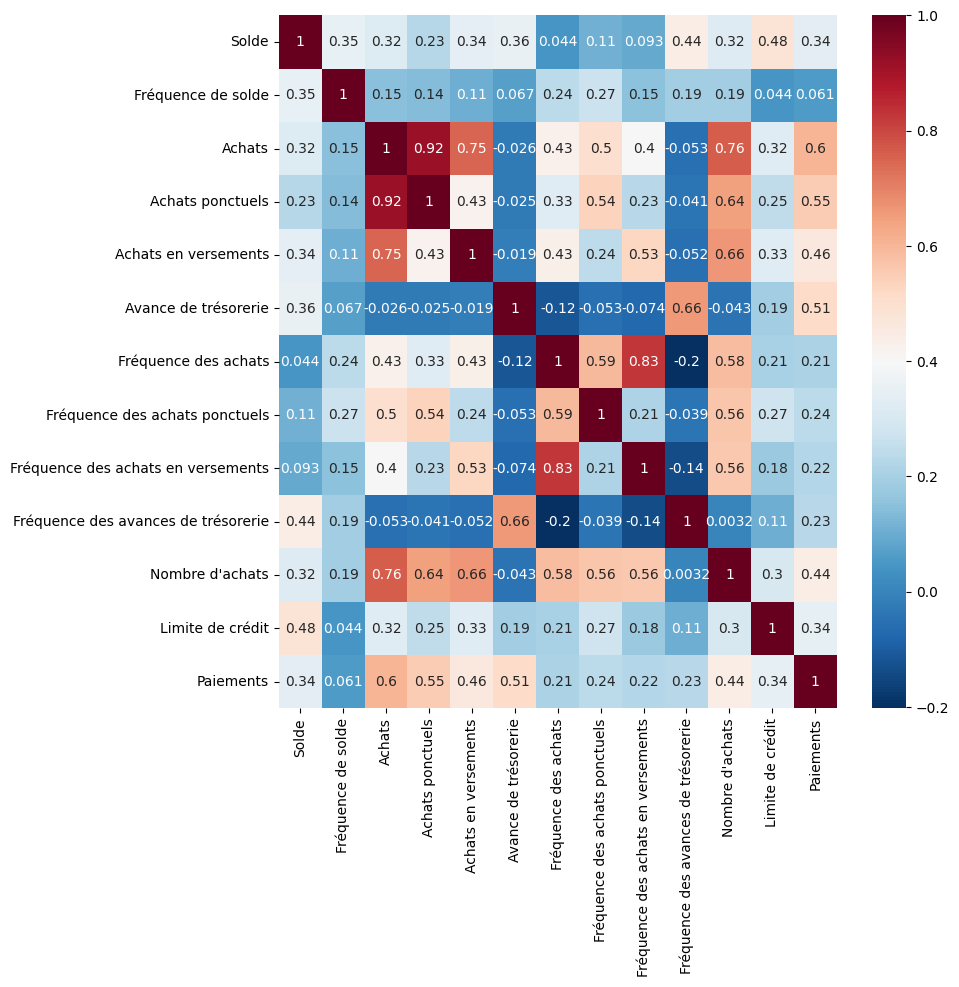

In [60]:
# Créer la heatmap de la matrice de corrélation
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r')
plt.show()

on remarque une forte correlation lineaire positive entre les deux variables "Achats" et "Achats Ponctuels" , les deux variables "Achats" et "Achats en versements", les deux variables "Achats" et "Nombre d achats" , les deux variables "Fréquence des achats" et "Fréquence des achats en versements".

In [61]:
# Supprimer les colonnes "Achats Ponctuels", "Achats en versements", "Nombre d achats", "Fréquence des achats en versements"
df.drop(columns=["Achats ponctuels", "Achats en versements", "Nombre d'achats", "Fréquence des achats en versements"], axis=1, inplace=True)
df.head()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.000000,1000,201.802084
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.250000,7000,4103.032597
2,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,7500,622.066742
3,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.083333,7500,0.000000
4,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,1200,678.334763


# Normalisation de la DataFrame

In [62]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)
scaled_df

array([[-0.85412443, -0.34436345, -0.49372554, ..., -0.64488051,
        -1.18436316, -0.56095737],
       [ 0.28033397,  0.06399134, -0.52714677, ...,  0.57533299,
         0.15093426,  0.4073219 ],
       [ 0.02652832,  0.47234613, -0.2562842 , ..., -0.64488051,
         0.26220905, -0.45664834],
       ...,
       [ 0.40023051,  0.47234613,  0.22007688, ...,  3.01575998,
         1.04113254,  1.43687735],
       [-0.86105716,  0.06399134, -0.42740158, ..., -0.64488051,
        -0.29416488, -0.52562401],
       [ 0.64241725,  0.47234613, -0.52714677, ..., -0.23814431,
         0.92985776, -0.29129346]])

# Réduction de dimensionnalité: ACP

In [63]:
# Calcul des composantes principales
ACP = PCA()
ACP.fit(scaled_df)
print('Nombre de composantes calculées : ', ACP.n_components_)

Nombre de composantes calculées :  9


In [64]:
# Afficher les valeurs propres
valeur_propr = ACP.explained_variance_
print("Valeurs Propres :\n", valeur_propr)

Valeurs Propres :
 [2.96694938 2.1019173  1.12955251 0.88078806 0.67848309 0.47095526
 0.38725826 0.25937607 0.15043433]


On remarque que les 3 premieres valeurs sont superieurs à 1

In [65]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    # Calculer le pourcentage d'inertie expliquée pour chaque composante
    scree = pca.explained_variance_ratio_ * 100

    # Tracer le scree plot
    plt.bar(np.arange(len(scree)) + 1, scree, label='Pourcentage d\'inertie par composante')
    plt.plot(np.arange(len(scree)) + 1, np.cumsum(scree), c="red", marker='o', label='Cumulatif')
    
    # Ajouter des annotations avec les valeurs sur les points rouges
    for i, txt in enumerate(np.cumsum(scree)):
        plt.annotate(f'{round(txt, 2)}%', (i + 1, txt + 1), color='black')

    plt.xlabel("Composantes")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Pourcentage de l'inertie pour chaque axe")
    plt.legend()
    plt.show(block=False)

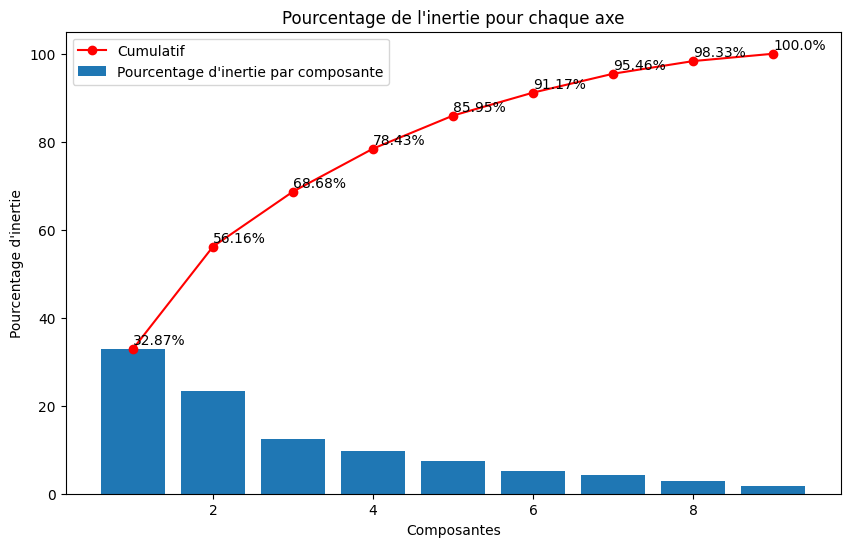

In [66]:
# Pourcentage de l'inertie cumulée pour chaque axe
plt.figure( figsize = ( 10, 6)) 
display_scree_plot(ACP)

Ici on remarque que la proportion cumuléé à 3 composantes est 68.68% de l information.

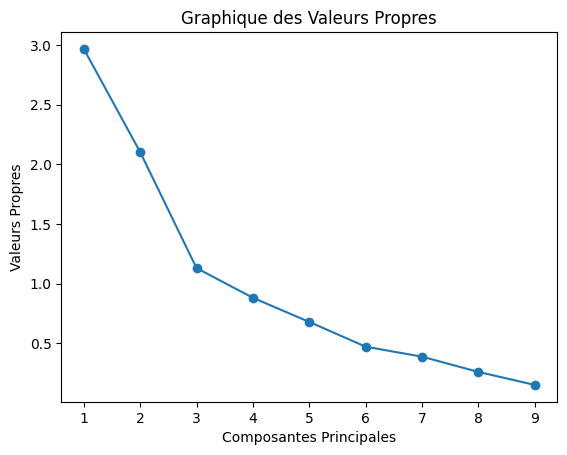

In [67]:
# Tracer le graphique des valeurs propres
plt.plot(range(1, len(valeur_propr) + 1), valeur_propr, marker='o')
plt.title('Graphique des Valeurs Propres')
plt.xlabel('Composantes Principales')
plt.ylabel('Valeurs Propres')
plt.show()

On remarque ici que le coude est present à la composante 3.

In [68]:
#appliquer l'acp pour avoir 3 composants du moment que 3 composantes nous permettent d'avoir 68.68%  de l'information
ACP_3 = PCA(n_components=3)
ACP_3_df = ACP_3.fit_transform(scaled_df)
ACP_3_df = pd.DataFrame(data=ACP_3_df ,columns=["Composante 1","Composante 3","Composante 2"])
ACP_3_df

,Composante 1,Composante 3,Composante 2
0,-2.055056,0.098036,0.137806
1,0.174704,2.360788,0.324991
2,0.690508,-1.904381,-0.943769
3,-1.176461,0.348372,0.968229
4,-1.673640,0.148877,-0.507584
...,...,...,...
346,0.646618,-1.872276,-0.782195
347,-0.203077,-1.438021,-0.682403
348,2.838334,1.760748,-0.193934
349,-1.264699,-0.507553,-0.102030


Conversion du DataFrame en un DataFrame 2D pour la visualisation

In [69]:
#appliquer l'acp pour avoir 2 composants 
ACP_2 = PCA(n_components=2)
principal_components = ACP_2.fit_transform(scaled_df)
ACP_2_df = pd.DataFrame(data=principal_components ,columns=["Composante 1","Composante 2"])
ACP_2_df

,Composante 1,Composante 2
0,-2.055056,0.098036
1,0.174704,2.360788
2,0.690508,-1.904381
3,-1.176461,0.348372
4,-1.673640,0.148877
...,...,...
346,0.646618,-1.872276
347,-0.203077,-1.438021
348,2.838334,1.760748
349,-1.264699,-0.507553


In [70]:
#cette fonction dessine le cercle de correlation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=1)
                        # Ajouter des flèches vers les variables
                        plt.arrow(0, 0, x, y, color='red', width=0.01, head_width=0.03)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)    

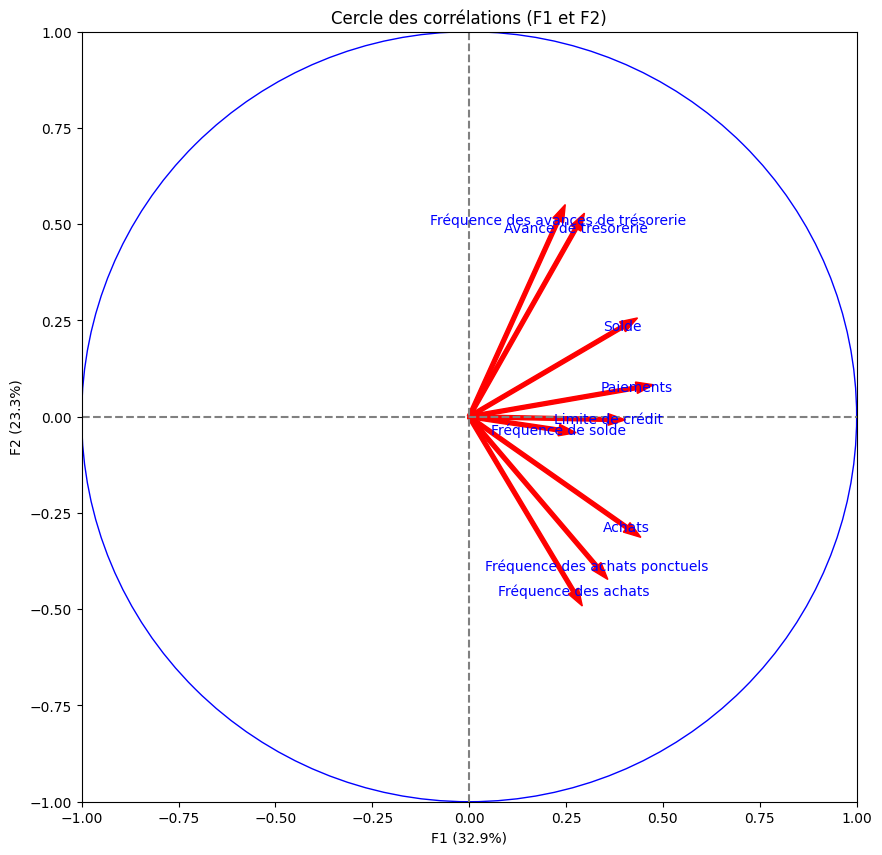

In [71]:
#utiliser la fonction display_circles() pour dessiner le cercle de correlation des 3 composantes
index = df.index 
features = df.columns
choix_n_comp = 3
pcs = ACP_3.components_
display_circles(pcs, choix_n_comp, ACP_3, [(0,1)], labels = np.array(features))

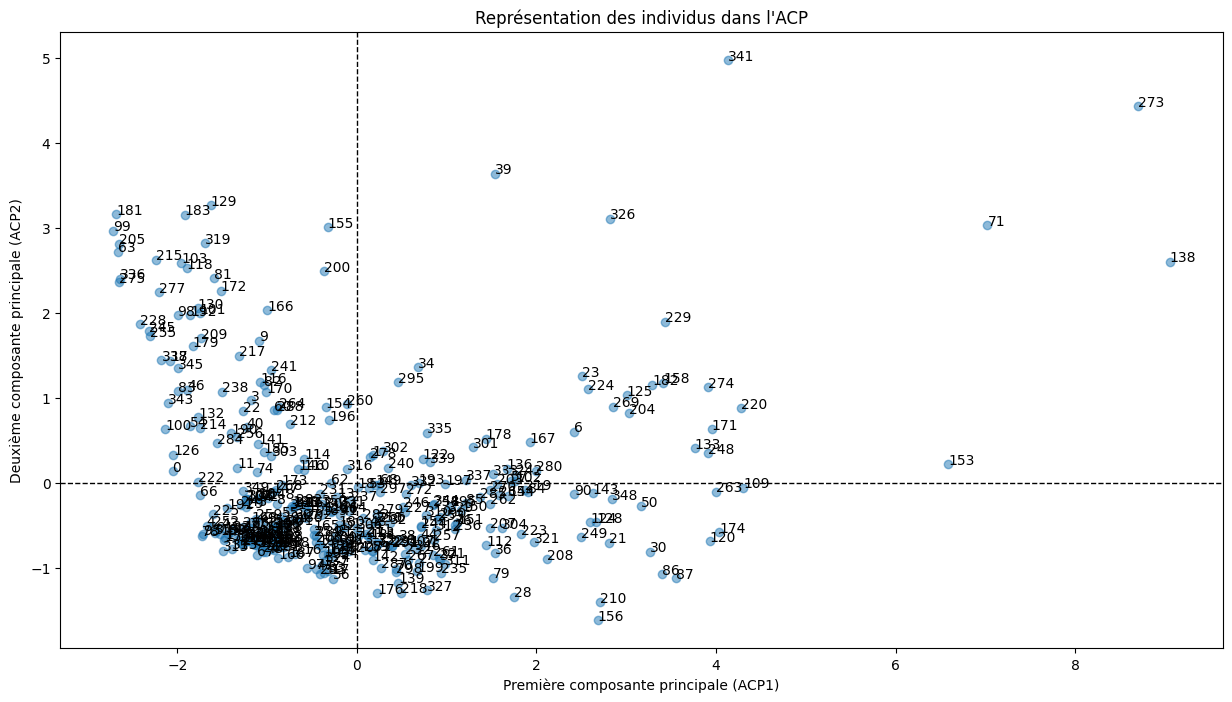

In [72]:
# Plotting des individus sur deux axes
plt.figure(figsize=(15, 8))
plt.scatter(ACP_3_df["Composante 1"], ACP_3_df["Composante 2"], alpha=0.5)
plt.title('Représentation des individus dans l\'ACP')
plt.xlabel('Première composante principale (ACP1)')
plt.ylabel('Deuxième composante principale (ACP2)')

# Annoter les points avec les indices des individus 
for i, txt in enumerate(ACP_3_df.index):
    plt.annotate(txt, (ACP_3_df["Composante 1"].iloc[i], ACP_3_df["Composante 2"].iloc[i]))

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

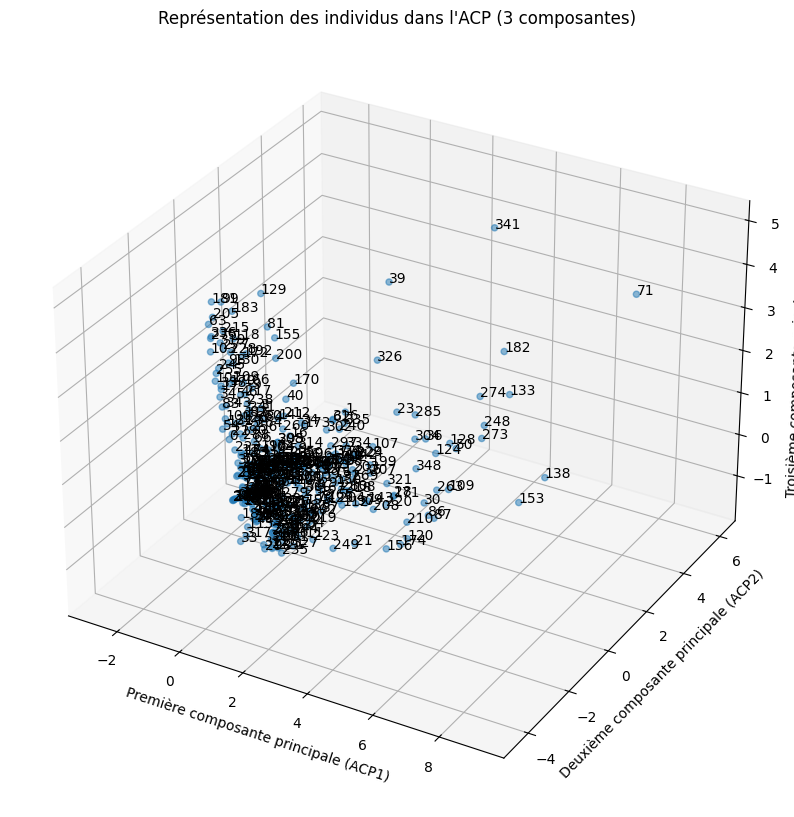

In [73]:
# Créer et ajuster le modèle ACP avec 3 composantes principales
ACP_3 = PCA(n_components=3)
principal_components_3D = ACP_3.fit_transform(scaled_df)
ACP_3_df = pd.DataFrame(data=principal_components_3D, columns=["ACP1", "ACP2", "ACP3"])

# Plotting en 3D
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ACP_3_df["ACP1"], ACP_3_df["ACP2"], ACP_3_df["ACP3"], alpha=0.5)

ax.set_title('Représentation des individus dans l\'ACP (3 composantes)')
ax.set_xlabel('Première composante principale (ACP1)')
ax.set_ylabel('Deuxième composante principale (ACP2)')
ax.set_zlabel('Troisième composante principale (ACP3)')

# Annoter les points avec les indices des individus (facultatif)
for i, txt in enumerate(ACP_3_df.index):
    ax.text(ACP_3_df["ACP1"].iloc[i], ACP_3_df["ACP2"].iloc[i], ACP_3_df["ACP3"].iloc[i], txt)

plt.show()

# Classification Hiérarchique Ascendante : CAH

In [74]:
# Calculer la matrice des liens pour le dendrogramme
linkage_matrix = sch.linkage(scaled_df, method='ward', metric='euclidean')

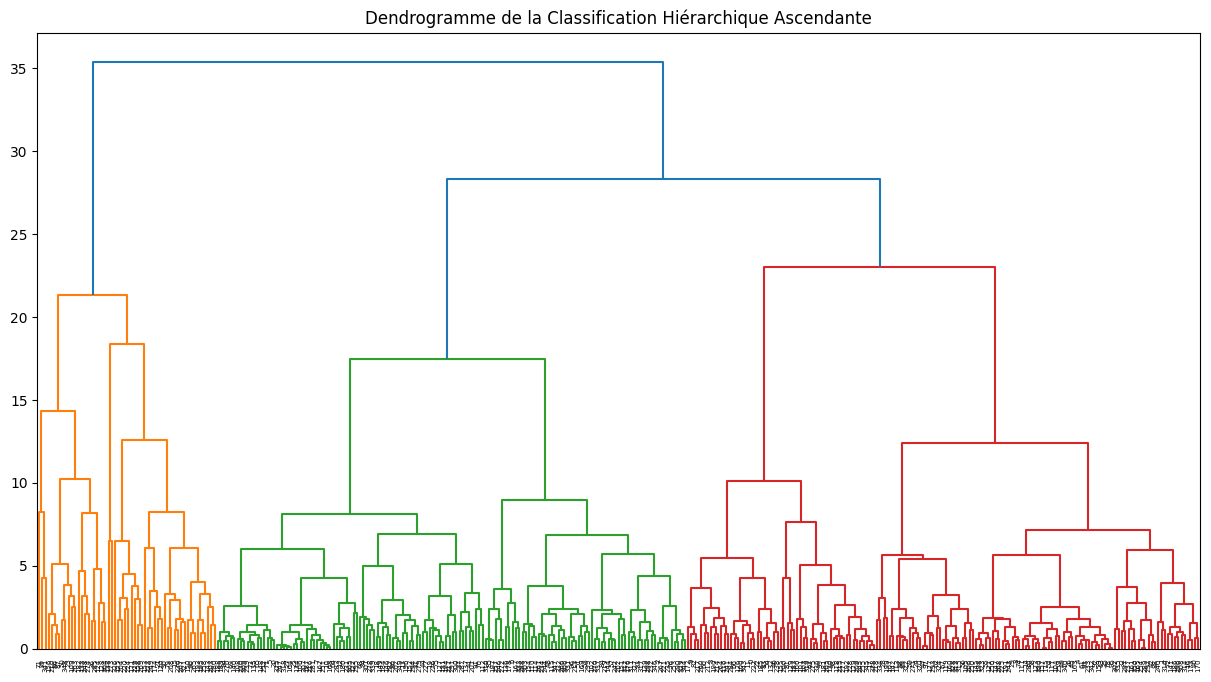

In [75]:
# Afficher le dendrogramme pour aider à choisir le nombre de clusters
plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogramme de la Classification Hiérarchique Ascendante")
plt.show()

À partir du dendrogramme, on choisit un seuil pour déterminer le nombre de clusters
On peut choisir un seuil horizontal à une hauteur de 25 qui coupe le dendrogramme et crée 3 clusters.
Les 3 clusters sont clairs sur le dendrogramme.

In [76]:
# Appliquer la classification hiérarchique avec le seuil choisi
threshold = 25
agg_cluster = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None, affinity='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(scaled_df)

In [77]:
# Ajouter les étiquettes de cluster au DataFrame
df_CAH = df.copy()
df_CAH['Cluster'] = cluster_labels
df_CAH.head()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,Cluster
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.000000,1000,201.802084,0
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.250000,7000,4103.032597,0
2,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,7500,622.066742,2
3,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.083333,7500,0.000000,0
4,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,1200,678.334763,0


Text(0.5, 1.0, 'Distribution des échantillons par cluster')

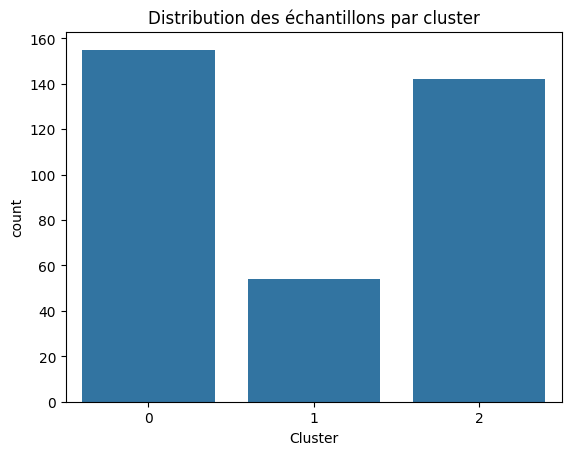

In [78]:
#Visualisation
sns.countplot(x='Cluster', data=df_CAH)
plt.title('Distribution des échantillons par cluster')

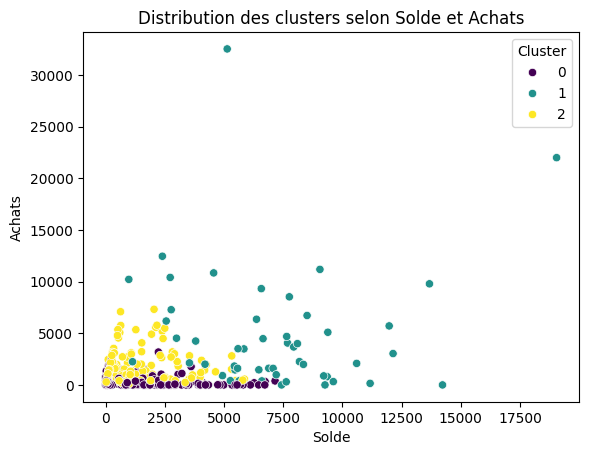

In [79]:
# Visualisation de la distribution des clusters selon les deux variables
sns.scatterplot(x='Solde', y='Achats', hue='Cluster', data=df_CAH, palette='viridis')

plt.title('Distribution des clusters selon Solde et Achats')

plt.legend(title='Cluster')

plt.show()

In [80]:
# Filtre pour les lignes où la colonne "Cluster" a une valeur égale à 1
df_cluster_1 = df_CAH[df_CAH["Cluster"] == 1]
df_cluster_1.describe()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,Cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,6864.914251,0.968013,4505.596111,4491.715027,0.713735,0.435957,0.324425,11701.851852,7958.988767,1.0
std,3485.522887,0.111910,5757.525717,5581.534320,0.348707,0.375891,0.293844,4182.882492,7477.997742,0.0
min,975.942008,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,2800.000000,0.000000,1.0
25%,4652.667390,1.000000,916.875000,0.000000,0.500000,0.083333,0.000000,9000.000000,2008.854677,1.0
50%,6619.011148,1.000000,2252.155000,2622.587041,0.916667,0.354166,0.333333,11125.000000,4772.428913,1.0
75%,8466.193582,1.000000,6068.827500,6947.561323,1.000000,0.750000,0.562500,13500.000000,11026.018037,1.0
max,19043.138560,1.000000,32539.780000,27296.485760,1.000000,1.000000,0.875000,21500.000000,32048.612200,1.0


In [81]:
# Filtre pour les lignes où la colonne "Cluster" a une valeur égale à 2
df_cluster_2 = df_CAH[df_CAH["Cluster"] == 2]
df_cluster_2.describe()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,Cluster
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0
mean,1475.492912,0.979371,1662.076620,253.319522,0.843843,0.427401,0.041009,5591.197183,1861.308958,2.0
std,1396.916117,0.063679,1577.045545,638.194810,0.206233,0.362588,0.091026,4090.354938,1856.740249,0.0
min,6.390383,0.636364,79.660000,0.000000,0.250000,0.000000,0.000000,500.000000,0.000000,2.0
25%,339.960213,1.000000,500.307500,0.000000,0.666667,0.083333,0.000000,2325.000000,609.099381,2.0
50%,1074.944006,1.000000,1039.005000,0.000000,1.000000,0.333333,0.000000,4750.000000,1256.072404,2.0
75%,2151.298739,1.000000,2350.515000,0.000000,1.000000,0.750000,0.000000,8000.000000,2351.971539,2.0
max,5860.433624,1.000000,7323.380000,4335.919227,1.000000,1.000000,0.545455,20000.000000,9172.788366,2.0


In [82]:
# Filtre pour les lignes où la colonne "Cluster" a une valeur égale à 0
df_cluster_0 = df_CAH[df_CAH["Cluster"] == 0]
df_cluster_0.describe()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,Cluster
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,1739.498633,0.791917,315.109032,914.957577,0.170148,0.056145,0.148604,5116.774194,1097.046294,0.0
std,1875.464715,0.292932,529.780050,1427.367057,0.223342,0.078937,0.193589,3546.144227,1339.256185,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.0
25%,72.526512,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,2350.000000,238.208072,0.0
50%,1254.669100,1.000000,75.990000,205.737165,0.083333,0.000000,0.083333,4200.000000,705.618627,0.0
75%,2703.264158,1.000000,389.980000,1477.968497,0.250000,0.083333,0.250000,7000.000000,1348.342095,0.0
max,7152.864372,1.000000,3183.000000,7616.064965,1.000000,0.333333,0.909091,23000.000000,9226.751112,0.0


In [83]:
#Enregistrer les données labelisées avec CAH
df_CAH.to_csv("Clusteré_CAH_Data.csv")

# K-MEANS

# Optimisation des hyperparamètres
## Trouver la valeur 'k' par la méthode du coude (Elbow Method)

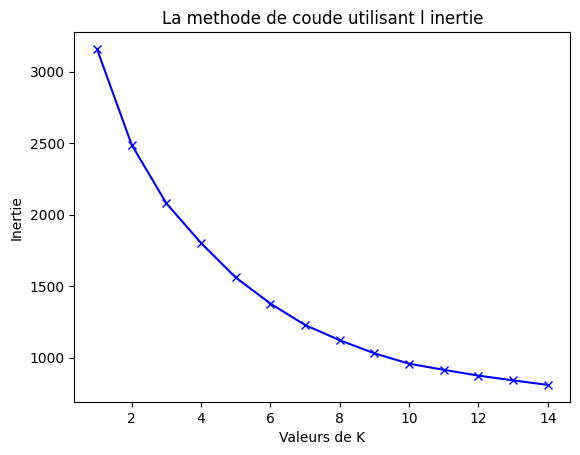

In [84]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Valeurs de K') 
plt.ylabel('Inertie') 
plt.title('La methode de coude utilisant l inertie') 
plt.show()

On remarque que le nombre de cluster optimal, d apres la methode de coude, est 3.

# Construction du modèle en utilisant l'algorithme KMeans

In [85]:
#construction de modele sur toute la dataframe initiale
kmeans_model=KMeans(n_clusters=3,n_init=5)
kmeans_model.fit_predict(scaled_df)
df_kmeans= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_kmeans.head()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,cluster
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.000000,1000,201.802084,0
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.250000,7000,4103.032597,1
2,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,7500,622.066742,2
3,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.083333,7500,0.000000,0
4,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,1200,678.334763,0


In [86]:
inertia = kmeans_model.inertia_
inertia 

2079.6182246826247

<Axes: xlabel='cluster', ylabel='count'>

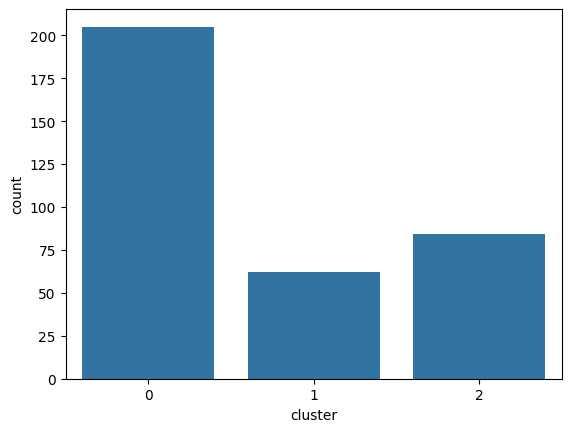

In [87]:
#Visualisation
sns.countplot(x='cluster', data=df_kmeans)

In [88]:
#construction de modele sur le resultat de l ACP (3 composantes)
kmeans_model_acp=KMeans(n_clusters=3,n_init=5)
kmeans_model_acp.fit_predict(scaled_df)
df_kmeans_acp= pd.concat([ACP_3_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_kmeans_acp.head()

,ACP1,ACP2,ACP3,cluster
0,-2.055056,0.098036,0.137806,0
1,0.174704,2.360788,0.324991,1
2,0.690508,-1.904381,-0.943769,2
3,-1.176461,0.348372,0.968229,0
4,-1.673640,0.148877,-0.507584,0


****Visualisation des clusters****

In [89]:
import plotly.express as px
fig = px.scatter_3d(df_kmeans_acp, x='ACP1', y='ACP2', z='ACP3', color='cluster',color_discrete_map={0: 'red', 1: 'green', 2: 'blue'})
fig.update_layout(title="Clustering avec K-Means en 3D")
fig.show()

In [90]:
# Trouver tous les centres de clusters
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=df.columns)
cluster_centers.head()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements
0,-0.429166,-0.275062,-0.322895,-0.297251,-0.315782,-0.493107,-0.329669,-0.392738,-0.347929
1,1.186887,0.330269,-0.126662,1.445678,-0.327003,-0.239300,1.653222,0.514193,0.556655
2,0.171334,0.427514,0.881506,-0.341614,1.012019,1.380043,-0.415687,0.578945,0.438247


In [91]:
# Inverser la transformation des données
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=df.columns)
print(cluster_centers.shape)
cluster_centers

(3, 9)


,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements
0,1225.195716,0.833610,583.031366,365.942949,0.400193,0.100256,0.064581,4557.073171,1060.102255
1,5728.896622,0.968370,1143.173548,5242.102375,0.395711,0.184934,0.470840,8632.258065,4704.700882
2,2898.701651,0.990019,4020.961667,241.830432,0.930556,0.725198,0.046958,8923.214286,4227.631239


In [92]:
cluster_1_df_kmeans = df_kmeans[df_kmeans["cluster"]==0]
cluster_1_df_kmeans.describe()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,cluster
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,1225.195716,0.833610,583.031366,365.942949,0.400193,0.100256,0.064581,4557.073171,1060.102255,0.0
std,1361.224354,0.268824,717.410992,742.285431,0.363457,0.135112,0.101565,3569.898831,1262.998688,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.0
25%,80.708806,0.727273,45.000000,0.000000,0.083333,0.000000,0.000000,1800.000000,325.578502,0.0
50%,862.072380,1.000000,320.000000,0.000000,0.250000,0.083333,0.000000,4000.000000,698.854095,0.0
75%,1808.972419,1.000000,861.490000,382.908547,0.666667,0.166667,0.083333,6000.000000,1288.287239,0.0
max,5860.433624,1.000000,3217.990000,3905.326256,1.000000,0.666667,0.416667,23000.000000,8735.607835,0.0


In [93]:
cluster_2_df_kmeans = df_kmeans[df_kmeans["cluster"]==1]
cluster_2_df_kmeans.describe()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,cluster
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,5728.896622,0.968370,1143.173548,5242.102375,0.395711,0.184934,0.470840,8632.258065,4704.700882,1.0
std,2865.995764,0.103433,1930.034304,4753.904853,0.397403,0.273715,0.220953,3878.736662,6278.017326,0.0
min,809.582978,0.454545,0.000000,348.834361,0.000000,0.000000,0.083333,2000.000000,0.000000,1.0
25%,3602.488764,1.000000,0.000000,2252.481761,0.000000,0.000000,0.333333,6000.000000,1495.368303,1.0
50%,5520.498327,1.000000,356.000000,3883.770153,0.250000,0.083333,0.416667,7700.000000,2082.828951,1.0
75%,7132.135876,1.000000,1376.155000,6471.712084,0.812500,0.250000,0.666667,11000.000000,4688.143784,1.0
max,14224.115410,1.000000,9792.230000,27296.485760,1.000000,1.000000,0.909091,20000.000000,32048.612200,1.0


In [94]:
cluster_3_df_kmeans = df_kmeans[df_kmeans["cluster"]==2]
cluster_3_df_kmeans.describe()

,Solde,Fréquence de solde,Achats,Avance de trésorerie,Fréquence des achats,Fréquence des achats ponctuels,Fréquence des avances de trésorerie,Limite de crédit,Paiements,cluster
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,2898.701651,0.990019,4020.961667,241.830432,0.930556,0.725198,0.046958,8923.214286,4227.631239,2.0
std,3211.958435,0.040510,4674.508395,533.099902,0.128602,0.290921,0.109423,4947.278955,4898.474292,0.0
min,53.208422,0.727273,126.200000,0.000000,0.333333,0.000000,0.000000,1200.000000,0.000000,2.0
25%,633.133027,1.000000,1338.060000,0.000000,0.916667,0.500000,0.000000,5650.000000,1279.162537,2.0
50%,2138.918720,1.000000,2772.480000,0.000000,1.000000,0.833333,0.000000,8500.000000,2490.643142,2.0
75%,3658.448500,1.000000,5250.762500,25.902549,1.000000,1.000000,0.020833,11625.000000,5120.694074,2.0
max,19043.138560,1.000000,32539.780000,1981.265503,1.000000,1.000000,0.583333,21500.000000,26652.344320,2.0


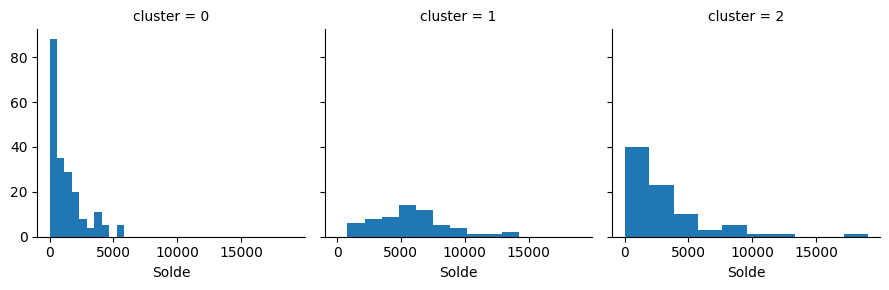

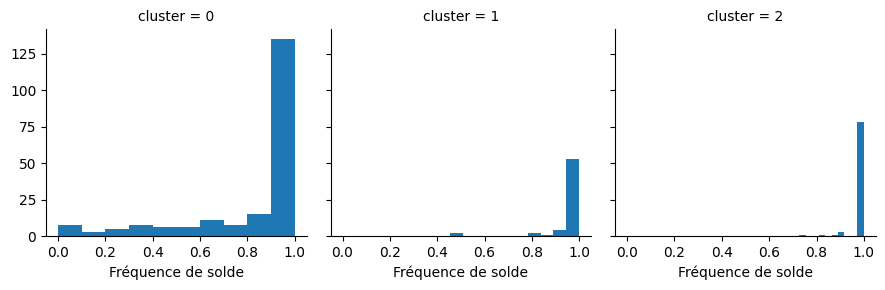

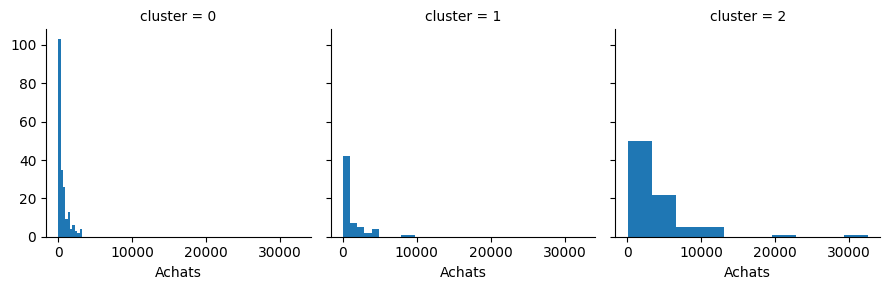

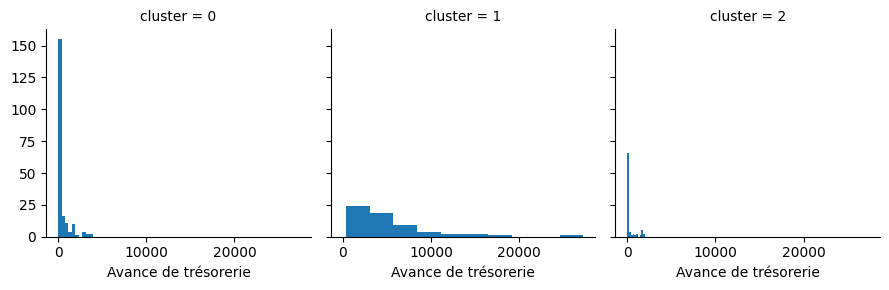

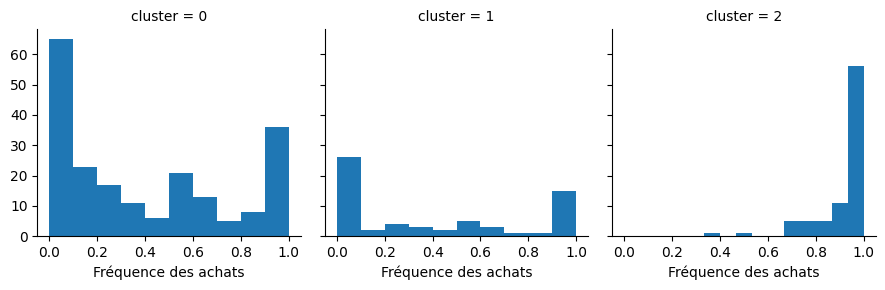

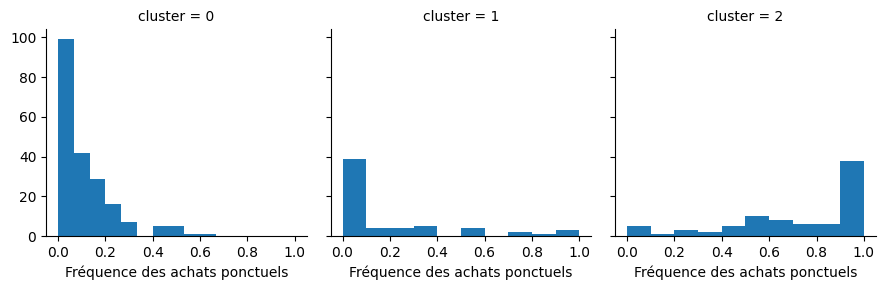

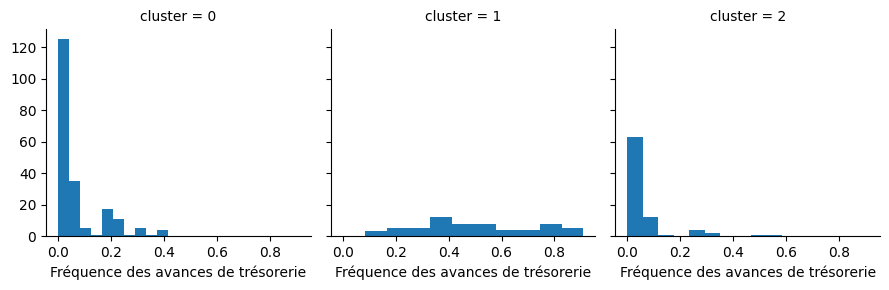

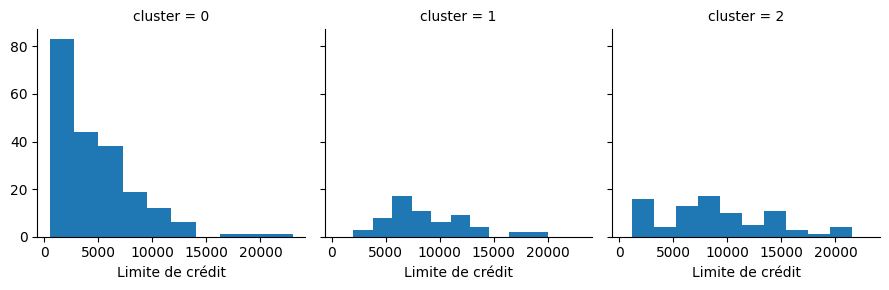

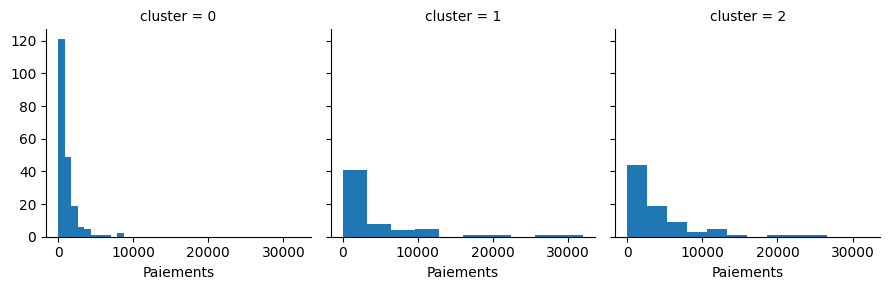

In [95]:
#Affichier chaque variable dans chaque cluster
for c in df_kmeans.drop(['cluster'],axis=1):
    grid= sns.FacetGrid(df_kmeans, col='cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# Sauvegarde du modèle de regroupement KMeans et des données avec les étiquettes de cluster

In [96]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [97]:
#Enregistrer les données labelisées avec Kmeans
df_kmeans.to_csv("Clusteré_k-means_Data.csv")